In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import linear_model

compute y = wx+b

In [ ]:
def Compute_Y(x, w, b):
    Y_hat = np.dot(x, w) + b
    return Y_hat

implementing cost fuction
squared error function sum(y - y_hat )**2

In [ ]:
def cost_function(y,y_hat,m):
  cost = np.sum((y - y_hat)**2)
  return cost/(2 * m)

implementing gradient desent for Linear regression

In [ ]:
def GD_Linear_Regression(X,W,B,Y,alpha,iter_number):
  num_samples, num_features = X.shape
  for iter in range(iter_number):
    y_hat = Compute_Y(X,W,B)
    dw = (1/num_samples) * np.dot(X.T,(y_hat - Y))
    db = (1/num_samples) * np.sum(y_hat - Y)
    W -= alpha * dw
    B = B - alpha * db
  return W,B

In [ ]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
alpha = 5.0e-7
iter_number = 1000
m = X_train.shape[0]
# Compute and display cost using our pre-chosen optimal parameters.
y_hat = Compute_Y(X_train, w_init, b_init)
print(f'Cost at optimal w : {y_hat}')
cost = cost_function(y_train, y_hat,m)
print(f'Cost: {cost}')
w,b = GD_Linear_Regression(X_train,w_init,b_init,y_train,alpha,iter_number)
print(w)
print(b)
y_hat = Compute_Y(X_train, w, b)
print(f'Cost at optimal w : {y_hat}')
cost = cost_function(y_train, y_hat,m)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : [459.99999762 231.99999837 177.99999899]
Cost: 1.5578904045996674e-12
[  0.39133535  18.75376741 -53.36032453 -26.42131618]
785.1811367994089
Cost at optimal w : [460.00000002 231.99999999 177.99999996]
Cost at optimal w : 3.1165217960964095e-16


# Better Implementation

In [ ]:
# Linear Regression class
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def cost_function(self,X_test,y,m):
        y_hat = self.predict(X_test)
        cost = np.sum((y - y_hat)**2)
        return cost/(2 * m)

    def r2_score(self,y_true, y_pred):
      y_true = np.array(y_true)
      y_pred = np.array(y_pred)

      mean_y_true = np.mean(y_true)
      ss_total = np.sum((y_true - mean_y_true)**2)
      ss_residual = np.sum((y_true - y_pred)**2)
      r2 = 1 - (ss_residual / ss_total)
      return r2


Testing on load_diabetes

In [ ]:
loadDiabetes = load_diabetes()
X = loadDiabetes.data
y = loadDiabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegressionGD(learning_rate=0.1,n_iterations=10000)
model.fit(X_train, y_train)
mseCost = model.cost_function(X_test, y_test,X.shape[0])
print(f"Cost: {mseCost}")
r2 = model.r2_score(y_test, model.predict(X_test))
print(f"R2_Score: {r2}")
# """
# In the context of sklearn.linear_model.LinearRegression, the score method computes the 𝑅^2
# (R-squared) metric. R-squared is a statistical measure that represents the proportion of
# the variance in the dependent variable that is predictable from the independent variables.
# It is also known as the coefficient of determination.
# """
print("SKLEARN MODEL")
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)


Cost: 288.6337173101799
R2_Score: 0.45889078751809853
SKLEARN MODEL


0.4526027629719195

# Normal Equation for Linear Regression
W = (X.T * X)^-1 * (X.T * Y)

AKA Minimum Sum Squared Error (MSSE) Technique

In [ ]:
def normal_equation(X, y):
    # Add a column of ones to X to account for the intercept term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    # Compute the normal equation using the pseudo-inverse
    w = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w

def predict_NEQ(X,w):
  # Reshape X to be a 2D array if it's 1D
  if X.ndim == 1:
      X = X.reshape(1, -1)  # Reshape to a single row
  X_b = np.c_[np.ones((X.shape[0], 1)), X]
  return np.dot(X_b,w)

In [ ]:
X = np.array([[1, 1], [2, 2], [2, 1], [1, 2]])
y = np.array( [ 10, 15, 13, 12 ] )
b = 0
w = normal_equation(X,y)
print(w)
# add one to make the predict
x1 = np.hstack(([1], X[1]))
y_hat = Compute_Y(x1, w, b)
print(f'predict Y_hat example#1: {y_hat}')

print("prediction", predict_NEQ( X[1], w ))

# predicting another vector
x2 = np.hstack(([1], [7,3]))
y_hat = Compute_Y(x2, w, b)
print(f'predict Y_hat example#2: {y_hat}')

[5. 3. 2.]
predict Y_hat example#1: 15.000000000000039
prediction [15.]
predict Y_hat example#2: 32.00000000000004


Testing MSSE

In [ ]:
loadDiabetes2 = load_diabetes()
X2 = loadDiabetes2.data
y2 = loadDiabetes2.target
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
MSSE_W = normal_equation(X_train2, y_train2)
y_hat2 = predict_NEQ(X_test2, MSSE_W)

def r2_score(y_true, y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  mean_y_true = np.mean(y_true)
  ss_total = np.sum((y_true - mean_y_true)**2)
  ss_residual = np.sum((y_true - y_pred)**2)
  r2 = 1 - (ss_residual / ss_total)
  return r2

r22 = r2_score(y_test2, y_hat2)
print(f"R2_Score: {r22}")

R2_Score: 0.45260276297192037


In [ ]:
def predict_NEQ_for_classification(x,w,b):
  y_hat = Compute_Y(x2, w, b)
  if y_hat > 0:
    return 1
  else:
    return -1

In [ ]:
X = np.array([[1, 1], [2, 2], [2, 1], [1, 2]])
y = np.array( [ 1, -1, 1, -1 ] )
b = 0
w = normal_equation(X,y)
print(w)
x1 = np.hstack(([1], X[1]))
y_hat = predict_NEQ_for_classification(x1, w, b)
print(f'predict Y_hat example#1: {y_hat}')

# predicting another vector
x2 = np.hstack(([1], [7,3]))
y_hat = predict_NEQ_for_classification(x2, w, b)
print(f'predict Y_hat example#2: {y_hat}')

# cost = cost_function(y, y_hat)
# print(f'Cost at optimal w : {cost}')

[ 3.00000000e+00 -1.60982339e-15 -2.00000000e+00]
predict Y_hat example#1: -1
predict Y_hat example#2: -1


# Linear Regression with Regularization term


*   Regularization is just making the weights of certain feature small.
*   Like if we have: W_1 X_1 + W_2 X_2 + W_3 X_3 + W_4 X_4 + b Regularization will make W_3 and W_4 small values so that the features will have a small effect to the model. For example, 10 X_1 + 5 X_2 + .0001 X_3 + .00005 X_4 + 100
*   So, the question now why we just remove these features instead of making the effect small? Because sometimes we don’t know what features we want to remove and sometimes it may influence predictions.








cost function for regularization

Notea:

*   L1 regularization also known as Lasso Regularization.
*   L2 regularization also known as Ridge Regularization. #what i implemented





In [ ]:
def Reg_cost_function(y,y_hat,weights,lamda,m):
  cost = np.sum((y - y_hat)**2)/(2 * m)  +  (lamda/(2*m)) * np.sum(weights**2)
  return cost

testing regularization cost function

In [ ]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
yhat = Compute_Y(X_tmp,w_tmp,b_tmp)
m = X_tmp.shape[0]
cost_tmp = Reg_cost_function(y_tmp, yhat, w_tmp, lambda_tmp,m)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214275


In [ ]:
# Linear Regression class
class LinearRegressionGDREG:
    def __init__(self, learning_rate=0.01, n_iterations=1000, lamda=2):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.lamda = lamda
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            regularization_term = (self.lamda/n_samples) * self.weights
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + regularization_term
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def r2_score(self,y_true, y_pred):
      y_true = np.array(y_true)
      y_pred = np.array(y_pred)

      mean_y_true = np.mean(y_true)
      ss_total = np.sum((y_true - mean_y_true)**2)
      ss_residual = np.sum((y_true - y_pred)**2)
      r2 = 1 - (ss_residual / ss_total)
      return r2

Testing

In [ ]:
loadDiabetes3 = load_diabetes()
X3 = loadDiabetes3.data
y3 = loadDiabetes3.target
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)
model3 = LinearRegressionGDREG(learning_rate=0.3,n_iterations=1000,lamda=.05)
model3.fit(X_train3, y_train3)

r2_3 = model3.r2_score(y_test3, model3.predict(X_test3))
print(f"R2_Score: {r2_3}")

print("SKLEARN MODEL")
lasso_reg = linear_model.Lasso(alpha=0.3, max_iter=100, tol=50.5)
lasso_reg.fit(X_train3, y_train3)
lasso_reg.score(X_test3, y_test3)

# regularization supposed to make the score higher but in this example it makes the score smaller

R2_Score: 0.4395945598527602
SKLEARN MODEL


0.3409005251541136

tries to improve the score of the data set using sklearn

In [ ]:
DiabetesDataXY = load_diabetes()
X_data = DiabetesDataXY.data
y_target = DiabetesDataXY.target
x_train, x_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=42)
print("SKLEARN MODEL1")
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_test, y_test))

print("SKLEARN MODEL2 use Laso regularization")
lasso_reg = linear_model.Lasso(alpha=0.3, max_iter=100, tol=50.5) # makes change to the worst
lasso_reg.fit(x_train, y_train)
print(lasso_reg.score(x_test, y_test))


SKLEARN MODEL1
0.4526027629719195
SKLEARN MODEL2 use Laso regularization
0.3409005251541136
SKLEARN MODEL2 use Ridge regularization
0.45862017068975747


In [ ]:
print("SKLEARN MODEL2 use Ridge regularization")
Ridge_reg = linear_model.Ridge(alpha=0.3, max_iter=100, tol=1000000) # does not make any change
Ridge_reg.fit(x_train, y_train)
print(Ridge_reg.score(x_test, y_test))

SKLEARN MODEL2 use Ridge regularization
0.45862017068975747


idea"1" is to shuffle the data

In [ ]:
DiabetesDataXY = load_diabetes()
X_data = DiabetesDataXY.data
y_target = DiabetesDataXY.target

# Stack the data and target together
data = np.column_stack((X_data, y_target))

# Shuffle the combined data
shuffled_data = shuffle(data,random_state=42)
# Separate the shuffled data and target
X_shuffled = shuffled_data[:, :-1]  # All columns except the last one (data)
y_shuffled = shuffled_data[:, -1]   # targets

x_train, x_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)
print("SKLEARN MODEL1")
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_test, y_test))

print("SKLEARN MODEL2 use Laso regularization")
lasso_reg = linear_model.Lasso(alpha=0.3, max_iter=100, tol=5) # makes change to the worst
lasso_reg.fit(x_train, y_train)
print(lasso_reg.score(x_test, y_test))

print("SKLEARN MODEL3 use Ridge regularization")
Ridge_reg = linear_model.Ridge(alpha=0.3, max_iter=100, tol=100) # as tol changes it does not make any change
Ridge_reg.fit(x_train, y_train)
print(Ridge_reg.score(x_test, y_test))

SKLEARN MODEL1
0.37994209442109383
SKLEARN MODEL2 use Laso regularization
0.28330192402072407
SKLEARN MODEL3 use Ridge regularization
0.4021758190931376


idea"2" change the test and train size

In [ ]:
DiabetesDataXY = load_diabetes()
X_data = DiabetesDataXY.data
y_target = DiabetesDataXY.target

# Stack the data and target together
data = np.column_stack((X_data, y_target))

# Shuffle the combined data
shuffled_data = shuffle(data,random_state=42)
# Separate the shuffled data and target
X_shuffled = shuffled_data[:, :-1]  # All columns except the last one (data)
y_shuffled = shuffled_data[:, -1]   # targets

x_train, x_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.3, random_state=42) # it makes a small change
print("SKLEARN MODEL1")
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_test, y_test))

print("SKLEARN MODEL2 use Laso regularization")
lasso_reg = linear_model.Lasso(alpha=0.3, max_iter=100, tol=50) # makes change to the worst
lasso_reg.fit(x_train, y_train)
print(lasso_reg.score(x_test, y_test))

print("SKLEARN MODEL3 use Ridge regularization")
Ridge_reg = linear_model.Ridge(alpha=0.3, max_iter=100, tol=9000) # as tol changes it does not make any change
Ridge_reg.fit(x_train, y_train)
print(Ridge_reg.score(x_test, y_test))

SKLEARN MODEL1
0.46404860521373537
SKLEARN MODEL2 use Laso regularization
0.3932511408415934
SKLEARN MODEL3 use Ridge regularization
0.4706852737966427


normalizing the data

In [ ]:
DiabetesDataXY = load_diabetes()
X_data = DiabetesDataXY.data
y_target = DiabetesDataXY.target

# Stack the data and target together
data = np.column_stack((X_data, y_target))

# Shuffle the combined data
shuffled_data = shuffle(data,random_state=42)
# Separate the shuffled data and target
X_shuffled = shuffled_data[:, :-1]  # All columns except the last one (data)
y_shuffled = shuffled_data[:, -1]   # targets

normalized_Xshuffled_data = preprocessing.normalize(X_shuffled)

x_train, x_test, y_train, y_test = train_test_split(normalized_Xshuffled_data, y_shuffled, test_size=0.3, random_state=42) # it makes a small change
print("SKLEARN MODEL1")
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_test, y_test))

print("SKLEARN MODEL2 use Laso regularization")
lasso_reg = linear_model.Lasso(alpha=0.3, max_iter=100, tol=50) # makes change to the worst
lasso_reg.fit(x_train, y_train)
print(lasso_reg.score(x_test, y_test))

print("SKLEARN MODEL3 use Ridge regularization")
Ridge_reg = linear_model.Ridge(alpha=0.3, max_iter=100, tol=9000) # as tol changes it does not make any change
Ridge_reg.fit(x_train, y_train)
print(Ridge_reg.score(x_test, y_test))

SKLEARN MODEL1
0.45712430057094333
SKLEARN MODEL2 use Laso regularization
0.34311945868290894
SKLEARN MODEL3 use Ridge regularization
0.4588994407005793


plotting to see the results

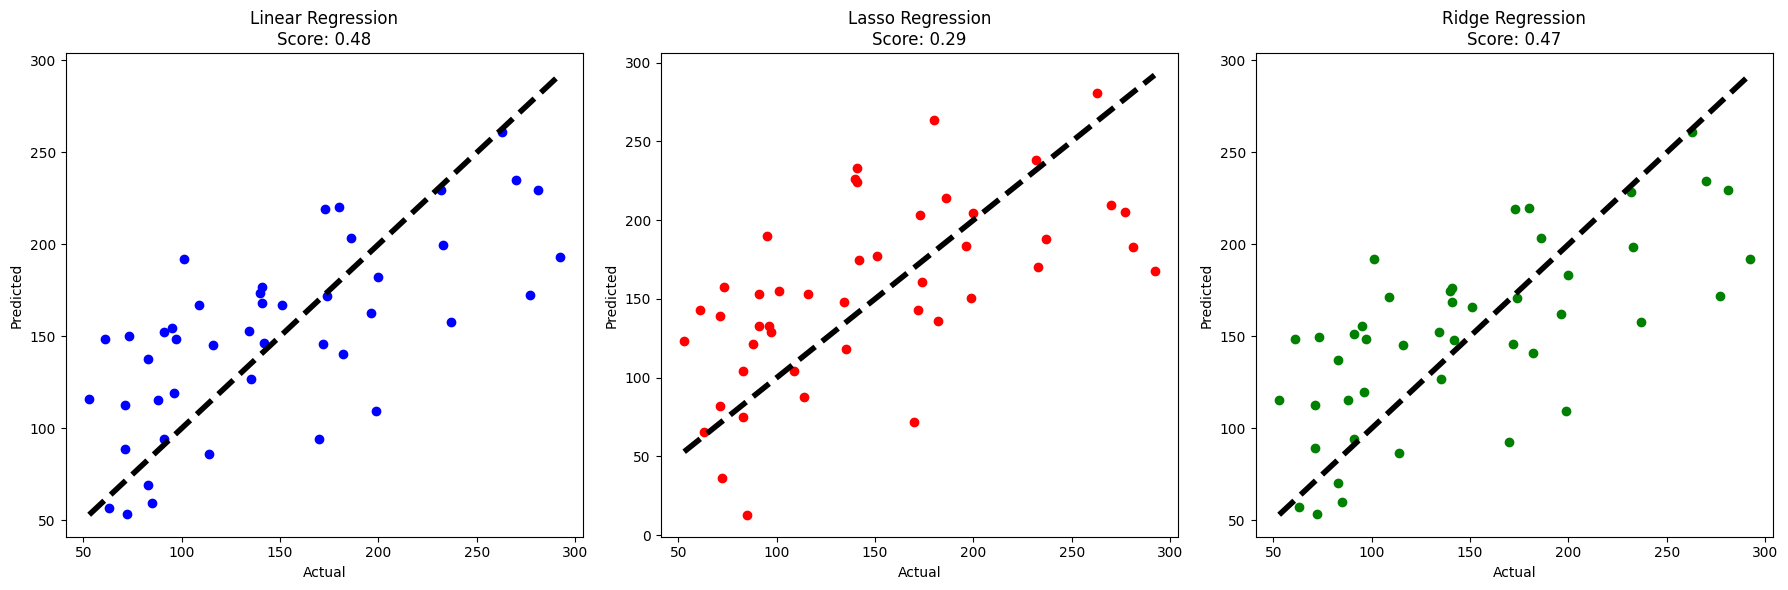

In [ ]:
import matplotlib.pyplot as plt

DiabetesDataXY = load_diabetes()
X_data = DiabetesDataXY.data
y_target = DiabetesDataXY.target

data = np.column_stack((X_data, y_target))

shuffled_data = shuffle(data, random_state=42)

X_shuffled = shuffled_data[:, :-1]  # All columns except the last one (data)
y_shuffled = shuffled_data[:, -1]   # targets

# Standardize the feature data
scaler = StandardScaler()
X_shuffled = scaler.fit_transform(X_shuffled)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.1, random_state=42)

# Linear Regression Model
reg = LinearRegression().fit(x_train, y_train)
reg_score = reg.score(x_test, y_test)
reg_pred = reg.predict(x_test)

# Lasso Regression Model
lasso_reg = Lasso(alpha=0.01, max_iter=1000, tol=100)
lasso_reg.fit(x_train, y_train)
lasso_score = lasso_reg.score(x_test, y_test)
lasso_pred = lasso_reg.predict(x_test)

# Ridge Regression Model
ridge_reg = Ridge(alpha=1.0, max_iter=1000, tol=6)
ridge_reg.fit(x_train, y_train)
ridge_score = ridge_reg.score(x_test, y_test)
ridge_pred = ridge_reg.predict(x_test)

# Plotting
plt.figure(figsize=(18, 6))

# Linear Regression Plot
plt.subplot(1, 3, 1)
plt.scatter(y_test, reg_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Linear Regression\nScore: {reg_score:.2f}')

# Lasso Regression Plot
plt.subplot(1, 3, 2)
plt.scatter(y_test, lasso_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Lasso Regression\nScore: {lasso_score:.2f}')

# Ridge Regression Plot
plt.subplot(1, 3, 3)
plt.scatter(y_test, ridge_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Ridge Regression\nScore: {ridge_score:.2f}')

plt.tight_layout()
plt.show()


I will improve the score in another implementations